<a href="https://colab.research.google.com/github/dtabuena/Images/blob/main/Sample_RNF182_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-bioformats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40.3 MB 32.4 MB/s 
     |████████████████████████████████| 132 kB 30.2 MB/s 
     |████████████████████████████████| 1.3 MB 31.5 MB/s 
     |████████████████████████████████| 829 kB 34.3 MB/s 
     |████████████████████████████████| 79 kB 8.1 MB/s 
     |████████████████████████████████| 9.2 MB 28.1 MB/s 
     |████████████████████████████████| 140 kB 41.9 MB/s 
  Created wheel for python-javabridge: filename=python_javabridge-4.0.3-cp37-cp37m-linux_x86_64.whl size=1628171 sha256=168f76685bc81211dc36e7e268964b0a85669ced141768e841660549b8ab3abe
  Stored in directory: /root/.cache/pip/wheels/63/7e/91/01b1bd8d29b4323834feb5cfec49b857fb212e6efc74ce103c
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=fcc80dca56d1a7bc09a703493289f70475e4c314a93002df8d0d6dbc42963566
  Stored in directory: /root/.cache/pip/wheels/56/b0

In [2]:
import numpy as np
import javabridge
import bioformats
import skimage
from skimage import filters
from matplotlib import pyplot as plt
import matplotlib
javabridge.start_vm(class_path=bioformats.JARS)

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
!wget -O 'image.oir' 'https://www.dropbox.com/s/ec4squfg12j7tm7/RNF182_08-12-22_S001_CA3_40X_2XZOOM_1_.oir?dl=0'
# !wget -O 'image.oir' 'https://www.dropbox.com/s/8yiynglvcfww3cd/RNF182_08-12-22_S001_CA3_40X_2XZOOM_2.oir?dl=0'
# !wget -O 'image.oir' 'https://www.dropbox.com/s/ie3v5wdhbahaigj/Nell2_08-04-22_S001_DG_40X_2XZOOM_1.oir?dl=0'
# !wget -O 'image.oir' 'https://www.dropbox.com/s/tf88caoqox1z765/Nell2_08-04-22_S001_CA3_40X_2XZOOM_7.oir?dl=0'
# !wget -O 'image.oir' 'https://www.dropbox.com/s/0597gxdoqco3aw6/MDGA2_08-25-22_S001_CA3_40X_2XZOOM_2.oir?dl=0'



target_name = 'RNF182'

--2022-09-27 21:31:58--  https://www.dropbox.com/s/ec4squfg12j7tm7/RNF182_08-12-22_S001_CA3_40X_2XZOOM_1_.oir?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ec4squfg12j7tm7/RNF182_08-12-22_S001_CA3_40X_2XZOOM_1_.oir [following]
--2022-09-27 21:31:59--  https://www.dropbox.com/s/raw/ec4squfg12j7tm7/RNF182_08-12-22_S001_CA3_40X_2XZOOM_1_.oir
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucef2dae5065cc96738aa7edf5a1.dl.dropboxusercontent.com/cd/0/inline/Btx9GMY1xx8T9shXiQEJ58fk0Lx7QDnWehS3pVPt9RO0QlpsUnPnhI8FdGKMwW1hPwabbtYtk7Gl_k9YyJJ5NljG3A0NpdeugMNPH8V9e70ckic2aq7Xo1nbs34njDW_T14z-nkEn6j4LO7QJiyphTYXXNjS8KYa_hjGARsLogBEJA/file# [following]
--2022-09-27 21:32:00--  https://ucef2dae5065cc96738aa7edf5a1.dl.dropboxuserconten

In [4]:
my_reader = bioformats.get_image_reader('my_image', 'image.oir')

c_dim = my_reader.rdr.getSizeC()
z_dim = my_reader.rdr.getSizeZ()
x_dim = my_reader.rdr.getSizeX()
y_dim = my_reader.rdr.getSizeY()
print(x_dim,y_dim,c_dim,z_dim)

image = np.empty([x_dim,y_dim,c_dim,z_dim])
for zi in range(z_dim):
    img_zi = my_reader.read(c=None, z=zi,rescale=True)
    image[:,:,:,zi] = img_zi


image_zproj = np.max(image,axis=3)
# image = np.expand_dims(image_zproj, axis=-1)
print(image.shape)
for ci in range(image.shape[2]):
    cim = image[:,:,ci,:]
    flat = cim.flatten()
    max= np.percentile(flat,100)
    assert max>0 , print(flat)
    cim = cim/max
    image[:,:,ci,:] = cim

800 800 3 10
(800, 800, 3, 10)


In [5]:
def new_colormap(start,stop,n=256):
    start = np.array(start)
    stop = np.array(stop)
    delta_ni = np.expand_dims((stop-start)/n,-1)
    ni = np.expand_dims(np.arange(n),-1)
    cmap_np = start + np.multiply(delta_ni.T,ni)
    return matplotlib.colors.ListedColormap(cmap_np)


green_map = new_colormap([0,0,0,1],[0,1,0,1])
red_map = new_colormap([0,0,0,1],[1,0,0,1])
white_map = new_colormap([0,0,0,1],[1,1,1,1])
blue_map = new_colormap([0,0,0,1],[0,0,1,1])

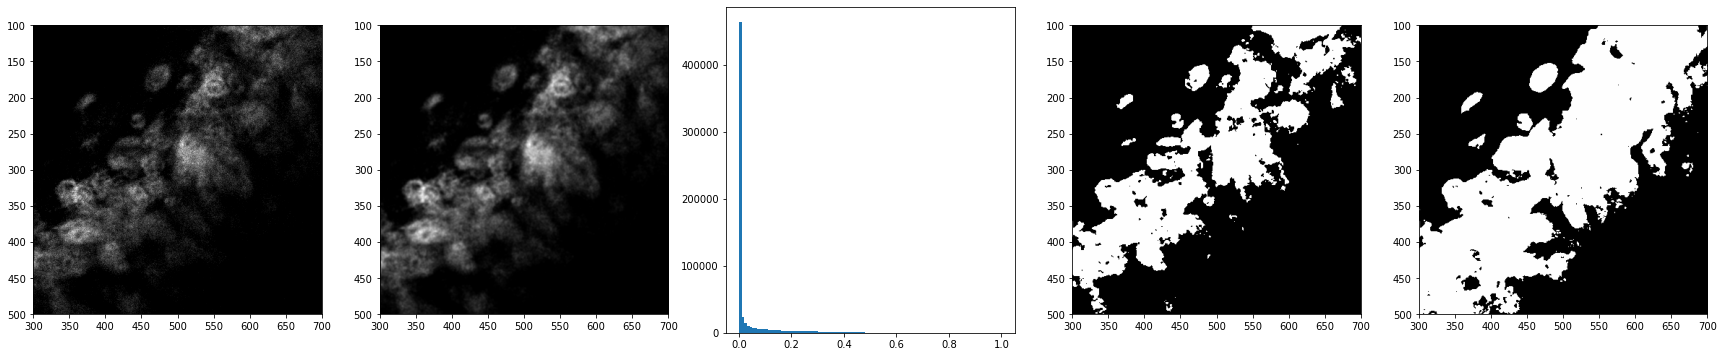

In [6]:
####################### Process NEUN
neun_im = image[:,:,2,:]
m_size = 2
g_sigma_1 = 1
g_sigma_2 = 10
saturation = 100
im_filtered = neun_im.copy()
im_binary= im_filtered.copy()
for zi in range(neun_im.shape[-1]):
    im_zi = neun_im[:,:,zi]
    im_zi = im_zi/np.max(im_zi.flatten())
    im_zi_mf = skimage.filters.median(im_zi, selem=np.ones([m_size,m_size]))   #### DeSpeckle
    im_zi = skimage.filters.gaussian(im_zi, sigma = g_sigma_1)   #### blur
    im_zi_bk = skimage.filters.gaussian(im_zi, sigma = g_sigma_2)  ### get background from big blur
    # im_zi = im_zi - im_zi_bk
    im_zi = im_zi/np.percentile(im_zi.flatten(),saturation)
    im_zi[im_zi>1]=1
    im_filtered[:,:,zi] = im_zi
    im_binary[:,:,zi] = im_filtered[:,:,zi]>filters.threshold_otsu(im_filtered[:,:,zi].flatten())*1

neun_im_f = im_filtered
neu_mask_z = im_binary
neu_mask_zp = np.max(neu_mask_z,axis=-1)


sp=2
fig,ax = plt.subplots(1,5,figsize=[30,6])
ax[0].imshow(neun_im[:,:,sp],cmap=white_map)
ax[1].imshow(neun_im_f[:,:,sp],cmap=white_map)
ax[2].hist(neun_im_f[:,:,sp].flatten(),100)
ax[3].imshow(neu_mask_z[:,:,sp],cmap=white_map)
ax[4].imshow(neu_mask_zp,cmap=white_map)

for ai in ax[[0,1, 3, 4]]:
    ai.set_xlim(300,700)
    ai.set_ylim(500,100)
plt.show()

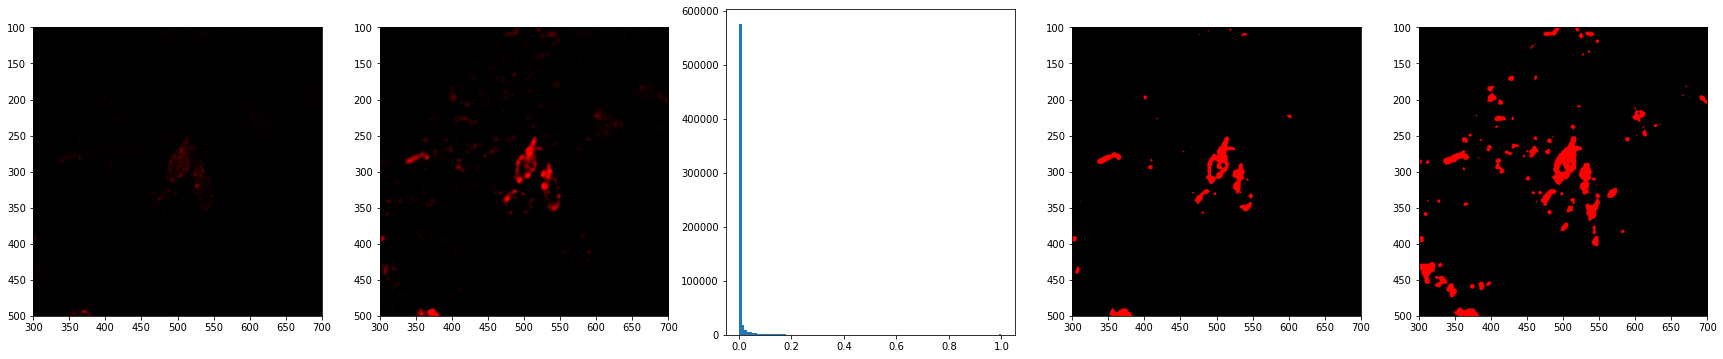

In [7]:
####################### Process mcherry
mcherry_im = image[:,:,1,:]
m_size = 2
g_sigma_1 = 2
g_sigma_2 = 10
saturation = 99.9
im_filtered = mcherry_im.copy()
im_binary = np.zeros_like(im_filtered)
for zi in range(neun_im.shape[-1]):
    im_zi = mcherry_im[:,:,zi]
    im_zi = im_zi/np.max(im_zi.flatten())
    im_zi = skimage.filters.median(im_zi, selem=np.ones([m_size,m_size]))   #### DeSpeckle
    im_zi = skimage.filters.gaussian(im_zi, sigma = g_sigma_1)   #### blur
    im_zi_bk = skimage.filters.gaussian(im_zi, sigma = g_sigma_2)  ### get background from big blur
    im_zi = im_zi - im_zi_bk
    im_zi[im_zi<0]=0
    im_zi = im_zi/np.percentile(im_zi.flatten(),saturation)
    im_zi[im_zi>1]=1
    im_filtered[:,:,zi] = im_zi
    im_binary[:,:,zi] = im_filtered[:,:,zi]>filters.threshold_otsu(im_filtered[:,:,zi].flatten())



mcherry_im_f = im_filtered
mcherry_mazk_z = im_binary
mcherry_mask_zp = np.max(mcherry_mazk_z,axis=-1)


fig,ax = plt.subplots(1,5,figsize=[30,6])
ax[0].imshow(mcherry_im[:,:,sp],cmap=red_map)
ax[1].imshow(mcherry_im_f[:,:,sp],cmap=red_map)
ax[2].hist(mcherry_im_f[:,:,sp].flatten(),100)
ax[3].imshow(mcherry_mazk_z[:,:,sp],cmap=red_map)
ax[4].imshow(mcherry_mask_zp,cmap=red_map)

for ai in ax[[0,1, 3, 4]]:
    ai.set_xlim(300,700)
    ai.set_ylim(500,100)
plt.show()

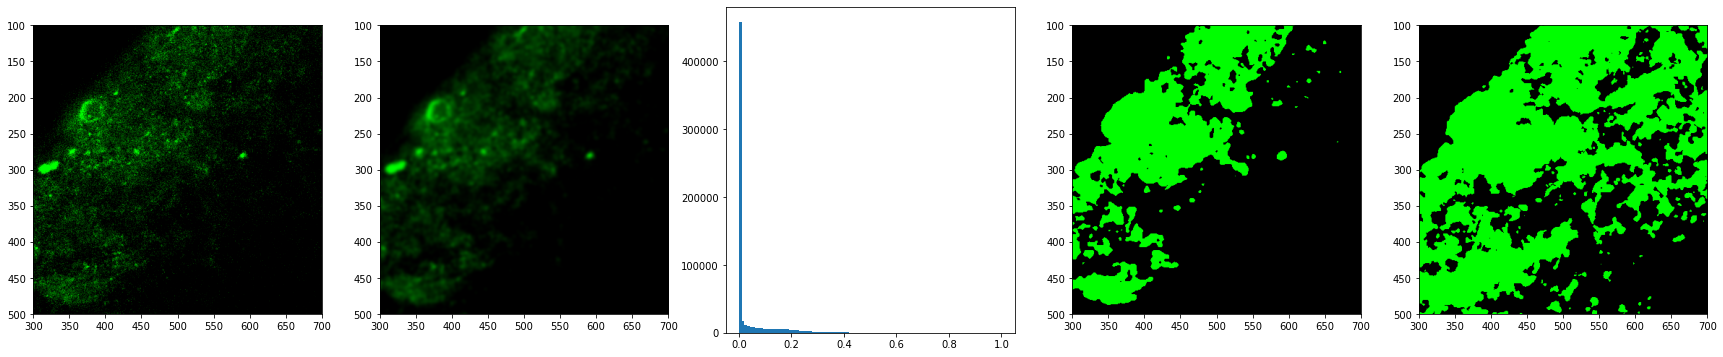

In [8]:
####################### Process CrispTarg
target_im = image[:,:,0,:]
m_size = 3
g_sigma_1 = 2
g_sigma_2 = 15
saturation = 100
im_filtered = target_im.copy()
im_binary = np.zeros_like(im_filtered)
for zi in range(target_im.shape[-1]):
    im_zi = target_im[:,:,zi]
    im_zi = skimage.filters.median(im_zi, selem=np.ones([m_size,m_size]))   #### DeSpeckle
    im_zi = skimage.filters.gaussian(im_zi, sigma = g_sigma_1)   #### blur
    im_zi_bk = skimage.filters.gaussian(im_zi, sigma = g_sigma_2)  ### get background from big blur
    # im_zi = im_zi - im_zi_bk
    # im_zi[im_zi_bs<0]=0
    im_zi = im_zi/np.percentile(im_zi.flatten(),saturation)
    im_filtered[:,:,zi] = im_zi
    im_binary[:,:,zi] = im_filtered[:,:,zi]>filters.threshold_otsu(im_filtered[:,:,zi].flatten())

target_im_f = im_filtered
target_mazk_z = im_binary
target_mask_zp = np.max(im_binary,axis=-1)

sp=1
fig,ax = plt.subplots(1,5,figsize=[30,6])
ax[0].imshow(target_im[:,:,sp],cmap=green_map)
ax[1].imshow(target_im_f[:,:,sp],cmap=green_map)
ax[2].hist(target_im_f[:,:,sp].flatten(),100)
ax[3].imshow(target_mazk_z[:,:,sp],cmap=green_map)
ax[4].imshow(target_mask_zp,cmap=green_map)

for ai in ax[[0,1, 3, 4]]:
    ai.set_xlim(300,700)
    ai.set_ylim(500,100)
plt.show()

In [9]:


# neuronal_mcherry = neuronal_mcherry/np.max(neuronal_mcherry.flatten())
# neuronal_target = neuronal_target/np.max(neuronal_target.flatten())
# neuronal_neun = neuronal_neun/np.max(neuronal_neun.flatten())*2

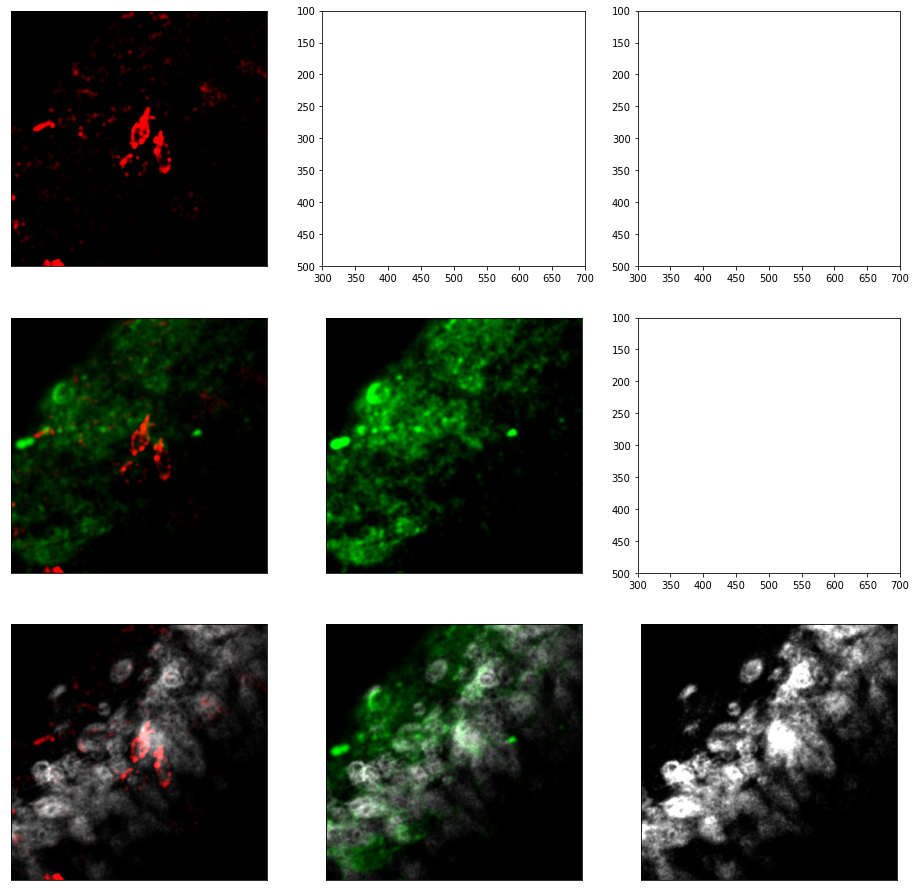

In [10]:
neuronal_mcherry = mcherry_im_f
neuronal_target = target_im_f
neuronal_neun = neun_im_f

sp=2
blanks = np.zeros_like(neuronal_mcherry)
neuronal_mcherry_rgb = np.stack([ neuronal_mcherry, blanks, blanks],axis = -2)
neuronal_target_rgb = np.stack([blanks, neuronal_target, blanks ],axis = -2)
neuronal_neun_rgb = np.stack([neuronal_neun, neuronal_neun, neuronal_neun ],axis = -2)

im_list = [neuronal_mcherry_rgb, neuronal_target_rgb, neuronal_neun_rgb]

fig,ax =plt.subplots(3,3,figsize = [16,16])
for im_i in range(len(im_list)):
    for im_i2 in range(len(im_list)):
        if im_i2>im_i: continue
        im_merge = (im_list[im_i] + im_list[im_i2])
        # im_merge = rgb_cmy(im_merge)*2
        ax[im_i,im_i2].imshow(im_merge[:,:,:,sp])
        ax[im_i,im_i2].get_xaxis().set_visible(False)
        ax[im_i,im_i2].get_yaxis().set_visible(False)


for ai in ax.flatten():
    ai.set_xlim(300,700)
    ai.set_ylim(500,100)
plt.show()

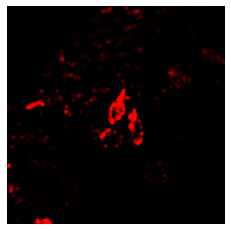

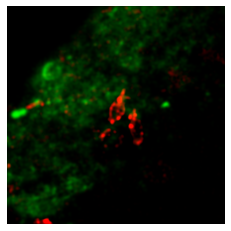

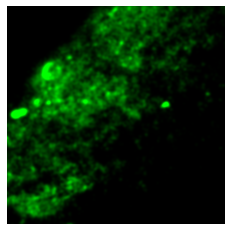

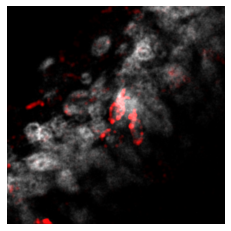

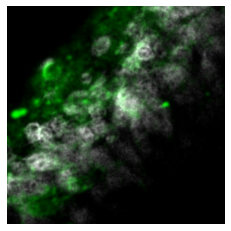

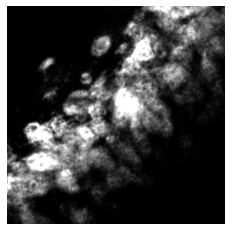

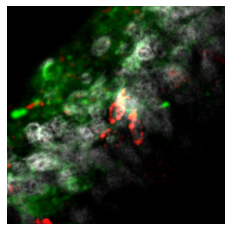

In [11]:
##### Save Samples
label_list = ['mCherry', 'Crispr_Target', 'NeuN']


## Singles and Doubles
for im_i in range(len(im_list)):
    for im_i2 in range(len(im_list)):
        if im_i2>im_i: continue

        
        name = label_list[im_i]+'+'+label_list[im_i2]
        if im_i==im_i2: name = label_list[im_i]

        fig, ax = plt.subplots(1,figsize = [4,4])
        im_merge = (im_list[im_i] + im_list[im_i2])
        
        ax.imshow(im_merge[:,:,:,sp])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax.set_xlim(300,700)
        ax.set_ylim(500,100)

        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

        fig.savefig(target_name+'_'+name+'.png', bbox_inches='tight')


### Trips
name = label_list[0]+'+'+label_list[1]+'+'+label_list[2]
fig, ax = plt.subplots(1,figsize = [4,4])
im_merge = (im_list[0] + im_list[1]+ im_list[2])

ax.imshow(im_merge[:,:,:,sp])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax.set_xlim(300,700)
ax.set_ylim(500,100)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

fig.savefig(target_name+'_'+name+'.png', bbox_inches='tight')
    

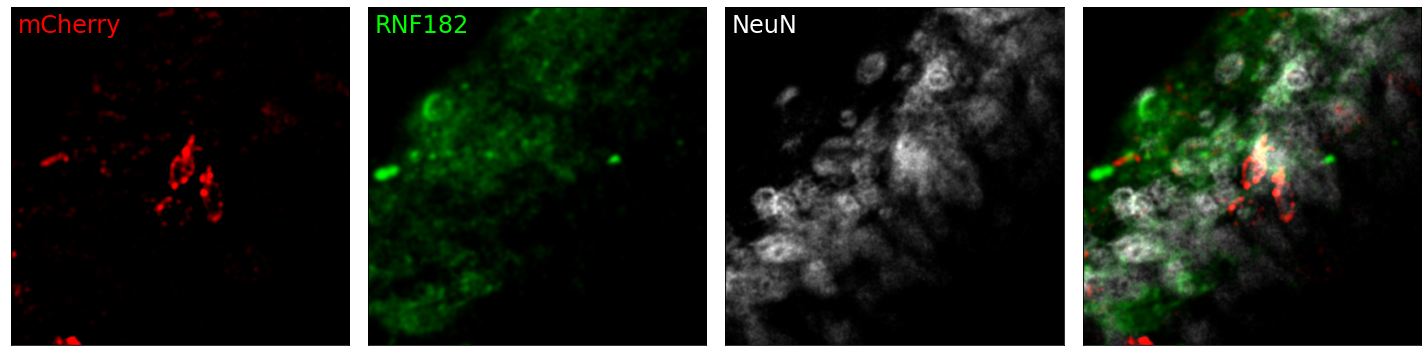

In [12]:
trip_merge = (im_list[0] + im_list[1]+ im_list[2])


## singles and Trip
fs = 24
fig, ax = plt.subplots(1,4,figsize=[20,5])
ax[0].imshow(neuronal_mcherry_rgb[:,:,:,sp])
ax[0].text(.02, .98, 'mCherry',color='r',transform=ax[0].transAxes,ha='left',va='top',fontsize = fs)
ax[1].imshow(neuronal_target_rgb[:,:,:,sp])
ax[1].text(.02, .98,target_name,color=[0,1,0],transform=ax[1].transAxes,ha='left',va='top',fontsize = fs)
ax[2].imshow(neuronal_neun_rgb[:,:,:,sp])
ax[2].text(.02, .98,'NeuN',color='w',transform=ax[2].transAxes,ha='left',va='top',fontsize = fs)
ax[3].imshow(trip_merge[:,:,:,sp])
for ai in ax.flatten():
    ai.set_xlim(300,700)
    ai.set_ylim(500,100)
    ai.get_xaxis().set_visible(False)
    ai.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()
fig.savefig(target_name+'_grouped'+'.png', bbox_inches='tight')

In [13]:
import os
import shutil
fold_name = 'Results_' + target_name
fold_name = fold_name.replace(' ','_')
zip_name= fold_name+'.zip'
try: os.mkdir(fold_name)
except: None

from google import colab
for root, dirs, files in os.walk("/content"):
    for f in files:
        if 'sample_data' in root: continue
        if 'Results' in root: continue
        if f.endswith(".png") or f.endswith(".csv"):
            shutil.copyfile(os.path.join(root,f), os.path.join(root,fold_name,f))

!zip -r $zip_name $fold_name
colab.files.download(zip_name)

  adding: Results_RNF182/ (stored 0%)
  adding: Results_RNF182/RNF182_Crispr_Target+mCherry.png (deflated 0%)
  adding: Results_RNF182/RNF182_Crispr_Target.png (deflated 0%)
  adding: Results_RNF182/RNF182_NeuN+mCherry.png (deflated 0%)
  adding: Results_RNF182/RNF182_NeuN+Crispr_Target.png (deflated 0%)
  adding: Results_RNF182/RNF182_NeuN.png (deflated 3%)
  adding: Results_RNF182/RNF182_grouped.png (deflated 0%)
  adding: Results_RNF182/RNF182_mCherry+Crispr_Target+NeuN.png (deflated 0%)
  adding: Results_RNF182/RNF182_mCherry.png (deflated 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>